<a href="https://colab.research.google.com/github/pawelszajwaj/Segregation/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pobranie z githuba plików audio

In [1]:
!git clone https://github.com/pawelszajwaj/Segregation.git

Cloning into 'Segregation'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 67 (delta 15), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (67/67), 91.80 MiB | 5.23 MiB/s, done.
Updating files: 100% (28/28), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [12]:
import tensorflow as tf

In [3]:
audio_files = glob('/content/Segregation/data/*/*.wav')
audio_files_good = glob('/content/Segregation/data/good/*.wav')
audio_files_mid = glob('/content/Segregation/data/mid/*.wav')
audio_files_bad = glob('/content/Segregation/data/bad/*.wav')

In [59]:
def plot_mel_spectrogram(filename):
  y, sr = librosa.load(filename)
  mel = librosa.feature.melspectrogram(y=y, 
                                    sr=sr,
                                    n_mels=128)
  mel_db = librosa.amplitude_to_db(np.abs(mel), ref = np.max)
  fig, ax = plt.subplots(figsize=(10,5))
  img = librosa.display.specshow(mel_db,
                             x_axis = 'time',
                             y_axis= 'log',
                             ax = ax)
  ax.set_title('Mel Spectrogram', fontsize=20)
  fig.colorbar(img, ax=ax, format=f'%0.2f')
  plt.show()

In [5]:
ipd.Audio(audio_files_bad[0])

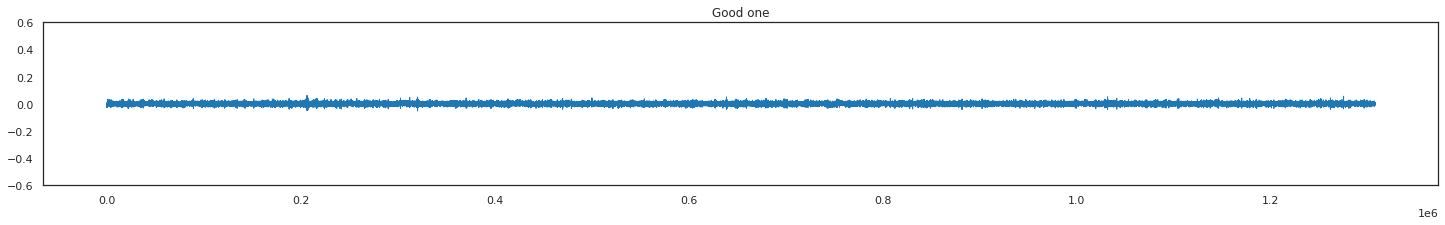

In [6]:
y, sr = librosa.load(audio_files_good[0])
pd.Series(y).plot(figsize=(25, 3), lw = 1, title = "Good one", color = color_pal[0], ylim=[-0.6, 0.6])

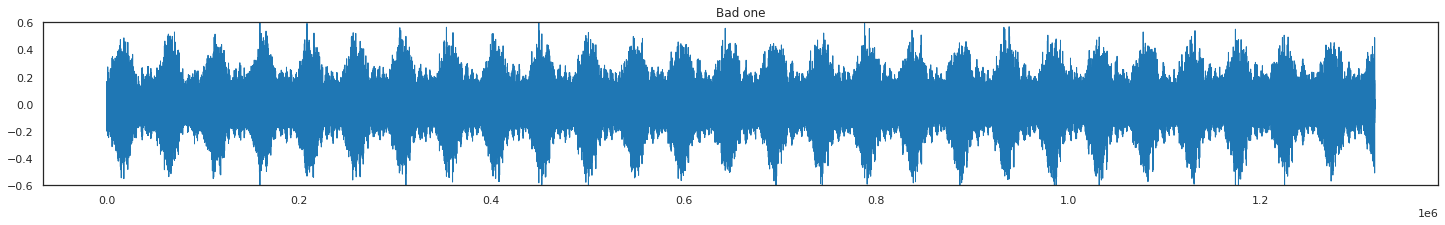

In [7]:
y, sr = librosa.load(audio_files_bad[0])
pd.Series(y).plot(figsize=(25, 3), lw = 1, title = "Bad one", color = color_pal[0], ylim=[-0.6, 0.6])

In [8]:
sample = librosa.stft(y)
sample_db = librosa.amplitude_to_db(np.abs(sample), ref = np.max)
sample_db.shape

(1025, 2577)

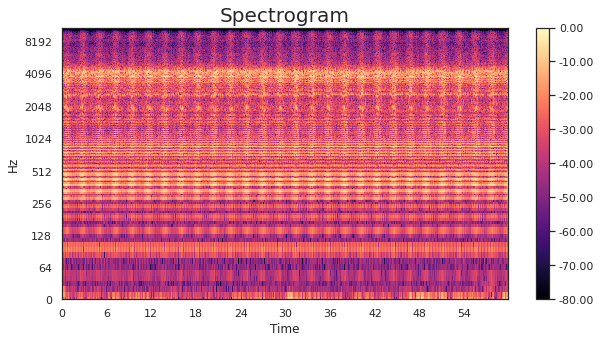

In [9]:
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(sample_db,
                             x_axis = 'time',
                             y_axis= 'log',
                             ax = ax)
ax.set_title('Spectrogram', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

22050


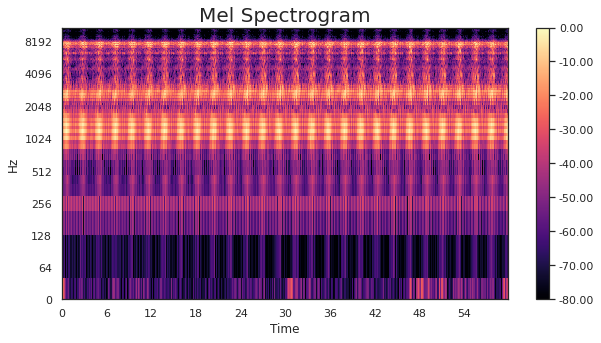

In [60]:
plot_mel_spectrogram(audio_files_bad[0])

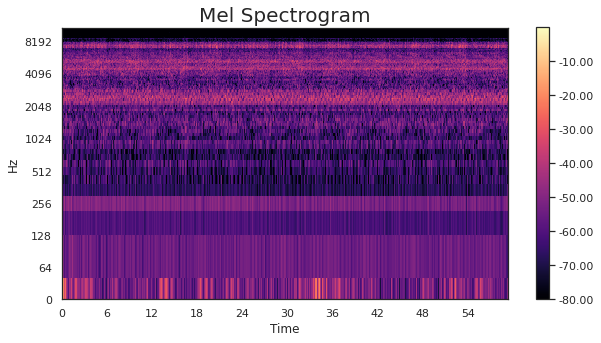

In [11]:
plot_mel_spectrogram(audio_files_good[0])

In [105]:
def split_audio(filename, seconds):
  y, sr = librosa.load(filename)
  window_size_seconds = seconds
  window_size_samples = window_size_seconds * sr
  start_sample = 0
  end_sample = window_size_samples
  data_set = []
  while (len(y) > start_sample):
    batch = (y[start_sample:end_sample])
    if (end_sample > len(y)):
      for x in range (len(batch), window_size_samples):
        batch = np.append(batch, 0)

    data_set.append(batch)
    start_sample += window_size_samples
    end_sample += window_size_samples
    
  return data_set




In [111]:
test = split_audio(audio_files_good[0], 3)
print(test[1])


[0.00420472 0.00470945 0.00362011 ... 0.00152547 0.00168444 0.00164235]


Tu Dzielimy pliki wav na 3 sekundowe odcinki i dodajemy je do odpowiednich tablic

In [116]:
good_data = []
bad_data = []
mid_data = []

for x in audio_files_good:
  temp_data = (split_audio(x, 3))
  for y in temp_data:
    good_data.append(y)

for x in audio_files_bad:
  temp_data = (split_audio(x, 3))
  for y in temp_data:
    bad_data.append(y)

for x in audio_files_mid:
  temp_data = (split_audio(x, 3))
  for y in temp_data:
    mid_data.append(y)



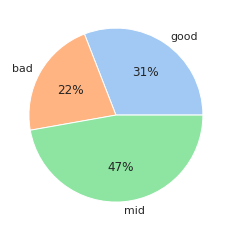

In [117]:
data = [len(good_data), len(bad_data), len(mid_data)]
labels = ['good', 'bad', 'mid']

colors = sns.color_palette('pastel')[0:5]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [119]:
def create_mel_spectrogram_data(y):
  mel = librosa.feature.melspectrogram(y=y, 
                                    sr=22050,
                                    n_mels=128)
  mel_db = librosa.amplitude_to_db(np.abs(mel), ref = np.max)
  return mel_db

In [120]:
mel_good_data = []
mel_bad_data = []
mel_mid_data = []

for x in good_data:
  mel_good_data.append(create_mel_spectrogram_data(x))

for x in bad_data:
  mel_bad_data.append(create_mel_spectrogram_data(x))

for x in mid_data:
  mel_mid_data.append(create_mel_spectrogram_data(x))


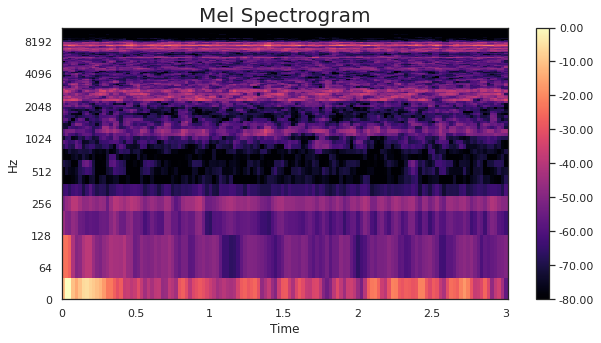

In [121]:
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(mel_mid_data[0],
                               x_axis = 'time',
                               y_axis= 'log',
                               ax = ax)
ax.set_title('Mel Spectrogram', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

Tensorflow flow

In [16]:
def load_wav(filename):
  file_contents = tf.io.read_file(filename)
  wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
  wav = tf.squeeze(wav, axis=-1)
  return wav

In [17]:
wave = load_wav(audio_files_good[0])
nwave = load_wav(audio_files_bad[0])

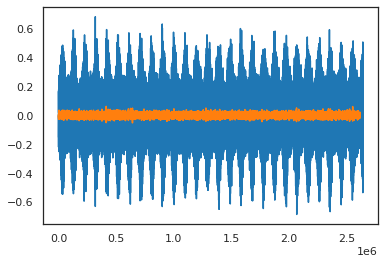

In [19]:
plt.plot(nwave)
plt.plot(wave)
plt.show()

In [28]:
good_wavs = tf.data.Dataset.list_files(audio_files_good)
bad_wavs = tf.data.Dataset.list_files(audio_files_bad)
mid_wavs = tf.data.Dataset.list_files(audio_files_mid)



In [29]:
good_wavs.as_numpy_iterator().next()

b'/content/Segregation/data/good/5.1.wav'

In [56]:
good = tf.data.Dataset.zip((good_wavs, tf.data.Dataset.from_tensor_slices(tf.ones(len(good_wavs)))))
bad = tf.data.Dataset.zip((bad_wavs, tf.data.Dataset.from_tensor_slices(tf.zeros(len(bad_wavs)))))
mid = tf.data.Dataset.zip((mid_wavs, tf.data.Dataset.from_tensor_slices(tf.fill(len(mid_wavs), 2.0))))

data = good.concatenate(mid)
data = data.concatenate(bad)

In [58]:
data.shuffle(1000).as_numpy_iterator().next()

(b'/content/Segregation/data/mid/4.1.wav', 2.0)

In [ ]:
def preprocess(file_path, label):
  wav = load_wav(file_path)
  wav = wav[:132300]
  zero_padding = tf.zeros([132300] - tf.shape(wav), dtype=tf.float32)
  y, sr = librosa.load(filename)
  mel = librosa.feature.melspectrogram(y=y, 
                                    sr=sr,
                                    n_mels=128)
  mel_db = librosa.amplitude_to_db(np.abs(mel), ref = np.max)


In [ ]:
 data = data.map(preprocess)
 data = data.cache()
 data = data.shuffle(buffer_size = 1000)
 data = data.batch(16)
 data = data.prefetch(8)